# Area of intersected circles
We will calculate the area of the connected circles based on the Monte Carlo simulation. The area of all non-integer circles will be calculated through the proportion of random points in relation to the area of a square (rectangle).

In [7]:
import math
import numpy as np
import random
import matplotlib.pyplot as plt

In [127]:
from collections import namedtuple
 
Circle = namedtuple("Circle", "x y r")
 
circles = [
    Circle( 1.6417233788,  1.6121789534, 0.0848270516),
    Circle(-1.4944608174,  1.2077959613, 1.1039549836),
    Circle( 0.6110294452, -0.6907087527, 0.9089162485),
    Circle( 0.3844862411,  0.2923344616, 0.2375743054),
    Circle(-0.2495892950, -0.3832854473, 1.0845181219),
    Circle( 1.7813504266,  1.6178237031, 0.8162655711),
    Circle(-0.1985249206, -0.8343333301, 0.0538864941),
    Circle(-1.7011985145, -0.1263820964, 0.4776976918),
    Circle(-0.4319462812,  1.4104420482, 0.7886291537),
    Circle( 0.2178372997, -0.9499557344, 0.0357871187),
    Circle(-0.6294854565, -1.3078893852, 0.7653357688),
    Circle( 1.7952608455,  0.6281269104, 0.2727652452),
    Circle( 1.4168575317,  1.0683357171, 1.1016025378),
    Circle( 1.4637371396,  0.9463877418, 1.1846214562),
    Circle(-0.5263668798,  1.7315156631, 1.4428514068),
    Circle(-1.2197352481,  0.9144146579, 1.0727263474),
    Circle(-0.1389358881,  0.1092805780, 0.7350208828),
    Circle( 1.5293954595,  0.0030278255, 1.2472867347),
    Circle(-0.5258728625,  1.3782633069, 1.3495508831),
    Circle(-0.1403562064,  0.2437382535, 1.3804956588),
    Circle( 0.8055826339, -0.0482092025, 0.3327165165),
    Circle(-0.6311979224,  0.7184578971, 0.2491045282),
    Circle( 1.4685857879, -0.8347049536, 1.3670667538),
    Circle(-0.6855727502,  1.6465021616, 1.0593087096),
    Circle( 0.0152957411,  0.0638919221, 0.9771215985)]

In [5]:
circles[0]

Circle(x=1.6417233788, y=1.6121789534, r=0.0848270516)

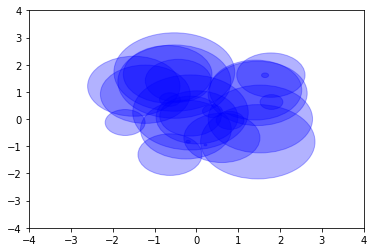

<Figure size 720x720 with 0 Axes>

In [27]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
for krug in range(len(circles)): 
    circle1 = plt.Circle((circles[krug][0], circles[krug][1]), circles[krug][2], color = 'b', alpha=0.3, clip_on=False);
    ax.add_patch(circle1);

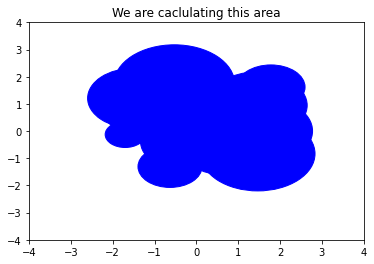

<Figure size 720x720 with 0 Axes>

In [29]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
ax.set_title('We are caclulating this area')
for krug in range(len(circles)): 
    circle1 = plt.Circle((circles[krug][0], circles[krug][1]), circles[krug][2], color = 'b', clip_on=False);
    ax.add_patch(circle1);

In [32]:
from itertools import combinations

def find_distance(p1,p2):
    return ((p1[0]-p2[0])**2 + (p1[1]+p2[1])**2)**0.5

In [37]:
#first, we remove circles within bigger circle
def remove_circles(circles):
    removed = set()
    for pair_of_circles in combinations(circles,2):
        small_circle, bigger_circle = sorted(pair_of_circles, key=lambda x: x[2]) # we sort the two circles by radius
        d = find_distance(small_circle, bigger_circle) # we calculate distance between the centeres of the circles
        if bigger_circle[2] >= small_circle[2]+d: # If distance between centers is higher then sum of two radius, smaller circle is in the bigger circle
            removed.add(small_circle)
    return [circle for circle in circles if circle not in removed]
            

In [38]:
circles = remove_circles(circles)

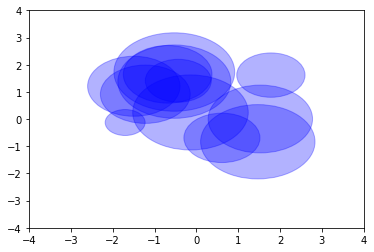

<Figure size 720x720 with 0 Axes>

In [39]:
# ali su ostali svi oni gde postoje preklapanja
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))
for krug in range(len(circles)): 
    circle1 = plt.Circle((circles[krug][0], circles[krug][1]), circles[krug][2], color = 'b', alpha=0.3, clip_on=False);
    ax.add_patch(circle1);

In [48]:
def find_circumscribint_rectangle(circles):
    xmin = min(c[0]-c[2] for c in circles)
    xmax = max(c[0]+c[2] for c in circles)
    ymin = min(c[1]-c[2] for c in circles)
    ymax = max(c[1]+c[2] for c in circles)
    return xmin, xmax, ymin, ymax

In [49]:
xmin, xmax, ymin, ymax = find_circumscribint_rectangle(circles)

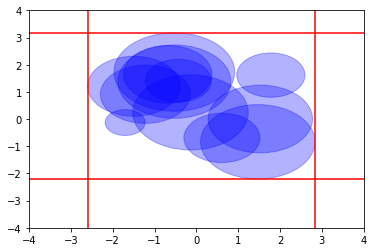

<Figure size 720x720 with 0 Axes>

In [50]:
fig, ax = plt.subplots()
plt.figure(figsize=(10,10))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))

for krug in range(len(circles)): 
    circle1 = plt.Circle((circles[krug][0], circles[krug][1]), circles[krug][2], color = 'b', alpha=0.3, clip_on=False);
    ax.add_patch(circle1)
ax.axvline(xmin, color = 'r')
ax.axvline(xmax, color = 'r')
ax.axhline(ymin, color = 'r')
ax.axhline(ymax, color = 'r')

In [65]:
# We are creating the frameworks inside the rectangle and loop through them
def iter_parts(xmin, xmax, ymin, ymax, n):
    xsize = (xmax-xmin)/n
    ysize = (ymax - ymin)/n
    for xstep in range(n):
        for ystep in range(n):
            xmin_part = xmin + xstep*xsize
            ymin_part = ymin + ystep*ysize
            yield xmin_part, xmin_part+xsize, ymin_part, ymin_part+ysize

In [72]:
xmin, xmax, ymin, ymax = find_circumscribint_rectangle(circles)

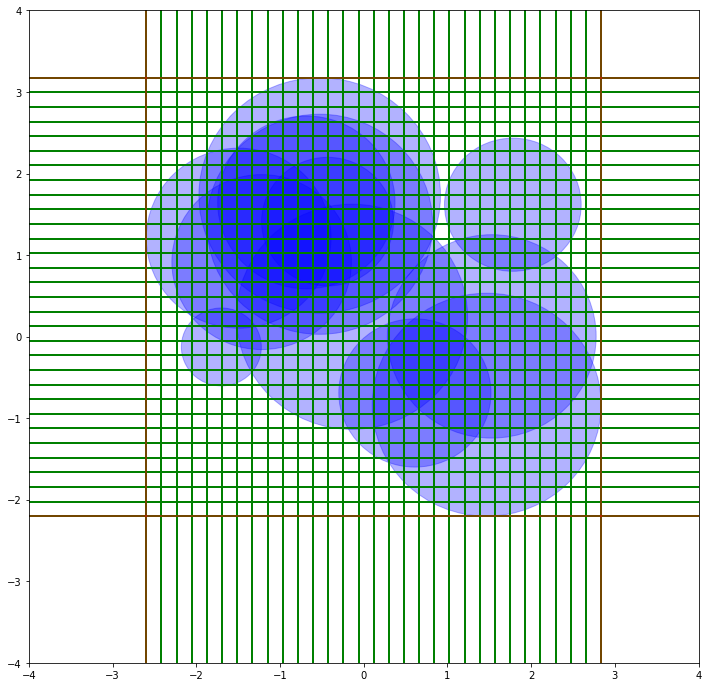

In [78]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.set_xlim((-4, 4))
ax.set_ylim((-4, 4))

for krug in range(len(circles)): 
    circle1 = plt.Circle((circles[krug][0], circles[krug][1]), circles[krug][2], color = 'b', alpha=0.3, clip_on=False);
    ax.add_patch(circle1)

for box_part in iter_parts(xmin, xmax, ymin, ymax, 30):
    xminpart, xpart, yminpart, ypart = box_part
    ax.axvline(xminpart, color = 'g', alpha=0.3)
    ax.axvline(xpart, color = 'g', alpha=0.3)
    ax.axhline(yminpart, color = 'g', alpha=0.3)
    ax.axhline(ypart, color = 'g', alpha=0.3)
ax.axvline(xmin, color = 'r', alpha=0.6)
ax.axvline(xmax, color = 'r', alpha=0.6)
ax.axhline(ymin, color = 'r', alpha=0.6)
ax.axhline(ymax, color = 'r', alpha=0.6);

In [123]:
# we create a function that tells us wheter all four angles of rectangle are in the circle
def box_inside(box, circles):
    xmin, xmax, ymin, ymax = box
    for circle in circles:
        if (find_distance([xmin, ymin], (circle[0], circle[1]))< circle[2] and find_distance([xmax, ymin], (circle[0], circle[1])) < circle[2] and find_distance([xmin, ymax], (circle[0], circle[1]))<circle[2] and find_distance([xmax, ymax], (circle[0], circle[1]))<circle[2]):
                return True
        return False


In [125]:
# now we create a function that make a Monte Carlo simulation for boxes that has some part of the circles in it
import random
def find_hitrate(box, circles, iterations):
    xmin, xmax, ymin, ymax = box
    hits = 0
    for i in range(iterations):
        zx = xmin + (xmax-xmin)* random.random() # this assures that hit is inside the box
        zy = ymin + (ymax-ymin)* random.random()
        for circle in circles:
            if find_distance((zx,zy),(circle[0], circle[1]))<circle[2]:
                hits +=1
                break
    return hits/iterations

In [131]:
def compute_total_area(circles, n, iterations):
    total_simulations = 0
    total_boxes=0
    skipped_boxes = 0
    total_points = 0
    circles = remove_circles(circles)
    xmin, xmax, ymin, ymax = find_circumscribint_rectangle(circles)
    box_area = ((xmax-xmin)*(ymax-ymin))/(n**2)
    for box_part in iter_parts(xmin, xmax, ymin, ymax, n):
        if box_inside(box_part, circles):
            skipped_boxes+=1
            total_boxes+=box_area
        else:
            total_points+=iterations
            simulated = find_hitrate(box_part, circles, iterations)
            total_simulations += box_area*simulated
    print(f'Share of skipped boxed {skipped_boxes/n**2}')
    print(f'Total number of all points drawn(in thousands): {total_points//10**3}')
    return total_simulations + total_boxes

In [132]:
compute_total_area(circles, 100, 2000)

Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576


17.86486188885694

Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576


Text(0, 0.5, 'calculated area')

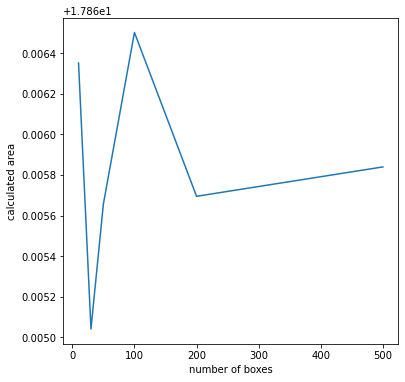

In [134]:
n = [10, 30, 50, 100, 200, 500]
areas = []
for num_of_boxes in n:
    areas.append(compute_total_area(circles, 100, 2000))
plt.figure(figsize=(6,6))
plt.plot(n, areas)
plt.xlabel('number of boxes')
plt.ylabel('calculated area')
    

Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 878
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 4394
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 8788
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 17576
Share of skipped boxed 0.1212
Total number of all points drawn(in thousands): 87880


Text(0, 0.5, 'calculated area')

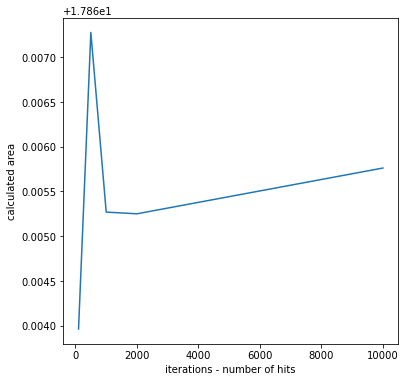

In [137]:
iterations = [100, 500, 1000, 2000, 10000]
areas = []
for iter_ in iterations:
    areas.append(compute_total_area(circles, 100, iter_))
plt.figure(figsize=(6,6))
plt.plot(iterations, areas)
plt.xlabel('iterations - number of hits')
plt.ylabel('calculated area')